<a href="https://colab.research.google.com/github/jlcalleu18/MicroCredential-DataAnalytics/blob/main/Day_7_Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
prop =pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/property.csv')

In [ ]:
prop

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [ ]:
new_prop = prop.set_index('PID')

In [ ]:
new_prop.head()

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
PID,,,,,,
100001000.0,104.0,PUTNAM,Y,3,1,1000
100002000.0,197.0,LEXINGTON,N,3,1.5,--
100003000.0,NaN,LEXINGTON,N,NaN,1,850
100004000.0,201.0,BERKELEY,12,1,NaN,700
NaN,203.0,BERKELEY,Y,3,2,1600


In [ ]:
new_prop.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 9 entries, 100001000.0 to 100009000.0
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ST_NUM        7 non-null      float64
 1   ST_NAME       9 non-null      object 
 2   OWN_OCCUPIED  8 non-null      object 
 3   NUM_BEDROOMS  9 non-null      object 
 4   NUM_BATH      8 non-null      object 
 5   SQ_FT         8 non-null      object 
dtypes: float64(1), object(5)
memory usage: 504.0+ bytes


In [ ]:
new_prop['NUM_BEDROOMS'].str.isnumeric()

PID
100001000.0     True
100002000.0     True
100003000.0      NaN
100004000.0     True
NaN             True
100006000.0      NaN
100007000.0     True
100008000.0     True
100009000.0    False
Name: NUM_BEDROOMS, dtype: object

In [ ]:
new_prop['NUM_BEDROOMS'] = new_prop['NUM_BEDROOMS'].fillna(0)
new_prop['SQ_FT'] = new_prop['SQ_FT'].fillna(0)

In [ ]:
new_prop

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
PID,,,,,,
100001000.0,104.0,PUTNAM,Y,3,1,1000
100002000.0,197.0,LEXINGTON,N,3,1.5,--
100003000.0,NaN,LEXINGTON,N,0,1,850
100004000.0,201.0,BERKELEY,12,1,NaN,700
NaN,203.0,BERKELEY,Y,3,2,1600
100006000.0,207.0,BERKELEY,Y,0,1,800
100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
100008000.0,213.0,TREMONT,Y,1,1,0
100009000.0,215.0,TREMONT,Y,na,2,1800


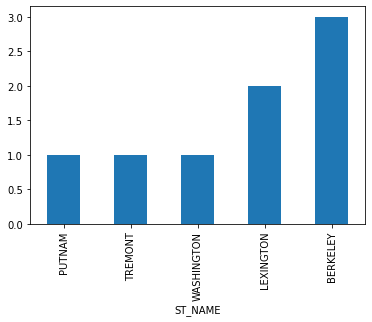

In [ ]:
new_prop.groupby(['ST_NAME'])['SQ_FT'].count().sort_values(ascending = True).plot(kind='bar')

#Rates second data set

In [ ]:
rates = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/2020%20November%20General%20Election%20-%20Turnout%20Rates.csv')

In [ ]:
rates

,State,Source,Official/Unofficial,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
0,United States,NaN,NaN,"158,835,004",NaN,66.4%,"239,247,182","257,605,088",7.8%,"1,461,074","1,962,811","616,440","3,294,457","4,971,025",NaN
1,Alabama,https://www2.alabamavotes.gov/electionnight/st...,Unofficial,"2,306,587","2,297,295",62.6%,"3,683,055","3,837,540",2.3%,"25,898","50,997","10,266","67,782",NaN,AL
2,Alaska,https://www.elections.alaska.gov/results/20GEN...,NaN,"367,000",NaN,69.8%,"525,568","551,117",3.4%,"4,293","2,074","1,348","6,927",NaN,AK
3,Arizona,https://results.arizona.vote/#/featured/18/0,NaN,"3,400,000",NaN,65.5%,"5,189,000","5,798,473",8.9%,"38,520","76,844","7,536","93,699",NaN,AZ
4,Arkansas,https://results.enr.clarityelections.com/AR/10...,Unofficial,"1,212,030","1,206,697",55.5%,"2,182,375","2,331,171",3.6%,"17,510","36,719","24,698","64,974",NaN,AR
5,California,https://electionresults.sos.ca.gov/,Unofficial,"16,800,000",NaN,64.7%,"25,962,648","30,783,255",15.0%,"104,730",0,"102,586","207,316",NaN,CA
6,Colorado,https://results.enr.clarityelections.com/CO/10...,NaN,"3,295,000",NaN,76.4%,"4,313,054","4,595,504",5.7%,"18,905",0,0,"18,905",NaN,CO
7,Connecticut,NaN,NaN,"1,850,000",NaN,71.1%,"2,603,327","2,839,560",7.7%,"13,268",0,"4,452","17,720",NaN,CT
8,Delaware,https://elections.delaware.gov/results/html/in...,Unofficial,"507,805","502,392",70.5%,"720,531","780,822",5.8%,"5,874","14,176",350,"15,013",NaN,DE
9,District of Columbia,https://electionresults.dcboe.org/election_res...,NaN,"350,000",NaN,64.7%,"540,685","582,065",7.1%,0,0,0,0,NaN,DC


In [ ]:
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                52 non-null     object
 1   Source                               40 non-null     object
 2   Official/Unofficial                  25 non-null     object
 3   Total Ballots Counted (Estimate)     52 non-null     object
 4   Vote for Highest Office (President)  24 non-null     object
 5   VEP Turnout Rate                     52 non-null     object
 6   Voting-Eligible Population (VEP)     52 non-null     object
 7   Voting-Age Population (VAP)          52 non-null     object
 8   % Non-citizen                        52 non-null     object
 9   Prison                               52 non-null     object
 10  Probation                            52 non-null     object
 11  Parole                               52 non-nul

In [ ]:
rates.columns

Index(['State', 'Source', 'Official/Unofficial',
       'Total Ballots Counted (Estimate)',
       'Vote for Highest Office (President)', 'VEP Turnout Rate',
       'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)',
       '% Non-citizen', 'Prison', 'Probation', 'Parole',
       'Total Ineligible Felon', 'Overseas Eligible', 'State Abv'],
      dtype='object')

In [ ]:
columns_to_be_dropped = ['Official/Unofficial', 'Overseas Eligible']

In [ ]:
rates.drop(columns_to_be_dropped, axis=1)

,State,Source,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,State Abv
0,United States,NaN,"158,835,004",NaN,66.4%,"239,247,182","257,605,088",7.8%,"1,461,074","1,962,811","616,440","3,294,457",NaN
1,Alabama,https://www2.alabamavotes.gov/electionnight/st...,"2,306,587","2,297,295",62.6%,"3,683,055","3,837,540",2.3%,"25,898","50,997","10,266","67,782",AL
2,Alaska,https://www.elections.alaska.gov/results/20GEN...,"367,000",NaN,69.8%,"525,568","551,117",3.4%,"4,293","2,074","1,348","6,927",AK
3,Arizona,https://results.arizona.vote/#/featured/18/0,"3,400,000",NaN,65.5%,"5,189,000","5,798,473",8.9%,"38,520","76,844","7,536","93,699",AZ
4,Arkansas,https://results.enr.clarityelections.com/AR/10...,"1,212,030","1,206,697",55.5%,"2,182,375","2,331,171",3.6%,"17,510","36,719","24,698","64,974",AR
5,California,https://electionresults.sos.ca.gov/,"16,800,000",NaN,64.7%,"25,962,648","30,783,255",15.0%,"104,730",0,"102,586","207,316",CA
6,Colorado,https://results.enr.clarityelections.com/CO/10...,"3,295,000",NaN,76.4%,"4,313,054","4,595,504",5.7%,"18,905",0,0,"18,905",CO
7,Connecticut,NaN,"1,850,000",NaN,71.1%,"2,603,327","2,839,560",7.7%,"13,268",0,"4,452","17,720",CT
8,Delaware,https://elections.delaware.gov/results/html/in...,"507,805","502,392",70.5%,"720,531","780,822",5.8%,"5,874","14,176",350,"15,013",DE
9,District of Columbia,https://electionresults.dcboe.org/election_res...,"350,000",NaN,64.7%,"540,685","582,065",7.1%,0,0,0,0,DC
